1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


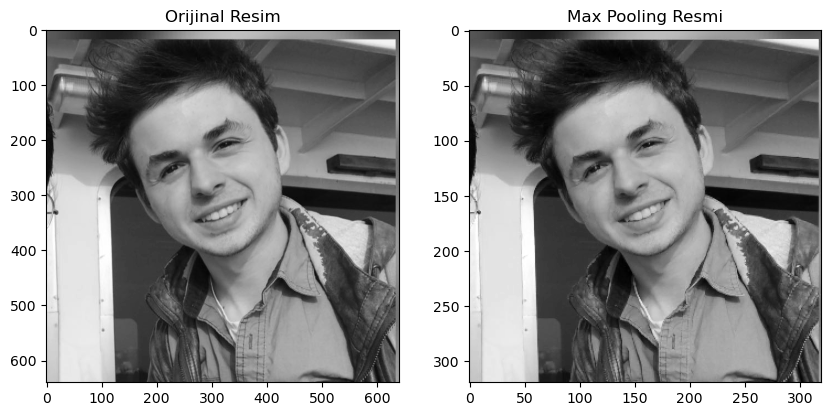

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, MaxPooling2D

# Resmi yükle ve grayscale (gri tonlamalı) hale getir
image = cv2.imread('my.jpg', cv2.IMREAD_GRAYSCALE)

# Gri tonlamalı resmi 4 boyutlu tensöre dönüştür
image = image.reshape(1, image.shape[0], image.shape[1], 1)

# Giriş katmanını tanımla
input_img = Input(shape=(image.shape[1], image.shape[2], 1))

# Max pooling katmanını ekle (2x2 havuzlama penceresi)
max_pool = MaxPooling2D(pool_size=(2, 2))(input_img)

# Modeli oluştur
model = Model(inputs=input_img, outputs=max_pool)

# Max pooling işlemini uygula
pooled_image = model.predict(image)

# Çıktıyı 2 boyutlu hale getir
pooled_image = pooled_image.reshape(pooled_image.shape[1], pooled_image.shape[2])

# Orijinal ve havuzlanmış resmi göster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Max Pooling Resmi')
plt.imshow(pooled_image, cmap='gray')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


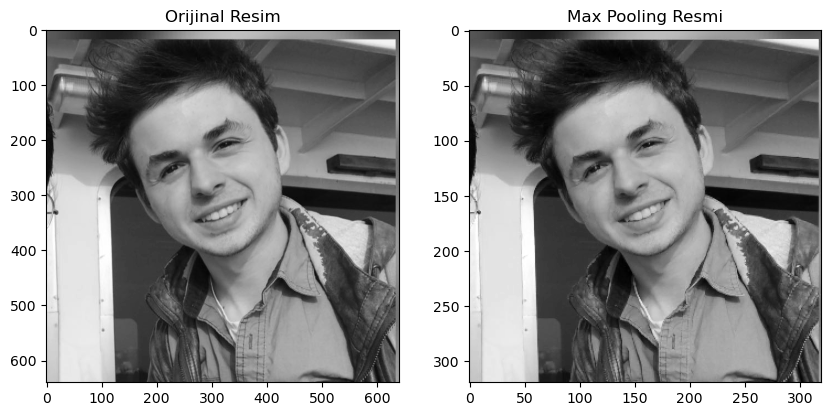

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, MaxPooling2D

# Resmi yükle ve grayscale (gri tonlamalı) hale getir
image = cv2.imread('my.jpg', cv2.IMREAD_GRAYSCALE)

# Gri tonlamalı resmi 4 boyutlu tensöre dönüştür
image = image.reshape(1, image.shape[0], image.shape[1], 1)

# Giriş katmanını tanımla
input_img = Input(shape=(image.shape[1], image.shape[2], 1))

# Max pooling katmanını ekle (2x2 havuzlama penceresi)
max_pool = MaxPooling2D(pool_size=(2, 2))(input_img)

# Modeli oluştur
model = Model(inputs=input_img, outputs=max_pool)

# Max pooling işlemini uygula
pooled_image = model.predict(image)

# Çıktıyı 2 boyutlu hale getir
pooled_image = pooled_image.reshape(pooled_image.shape[1], pooled_image.shape[2])

# Orijinal ve havuzlanmış resmi göster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Max Pooling Resmi')
plt.imshow(pooled_image, cmap='gray')
plt.show()


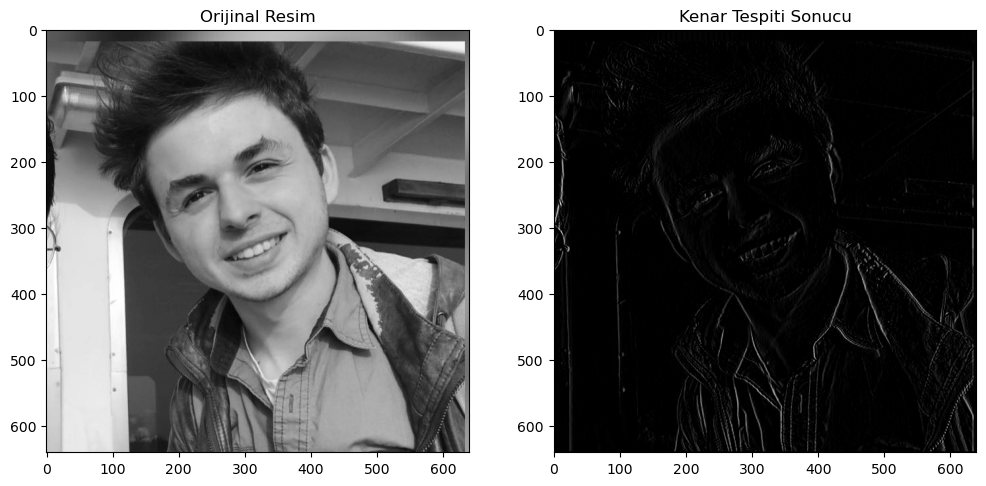

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ReLU aktivasyon fonksiyonu
def relu(x):
    return max(0, x)

# Kenar tespiti yapan fonksiyon
def edge_classifier(x1, x2, x3):
    # Ağırlıkları belirleyelim
    w1 = -1
    w2 = 0
    w3 = 1

    # Çıkışı hesapla
    output = relu(w1 * x1 + w2 * x2 + w3 * x3)
    return output

# Resmi yükle ve gri tonlamalı hale getir
image_path = 'my.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resmin boyutlarını al
height, width = image.shape

# Kenar tespiti sonucu için boş bir resim oluştur
edge_image = np.zeros((height, width), dtype=np.uint8)

# Kenar tespiti uygula
for y in range(1, height - 1):
    for x in range(1, width - 1):
        x1 = image[y, x - 1]
        x2 = image[y, x]
        x3 = image[y, x + 1]
        edge_image[y, x] = edge_classifier(x1, x2, x3)

# Sonuçları göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Kenar Tespiti Sonucu')
plt.imshow(edge_image, cmap='gray')
plt.show()


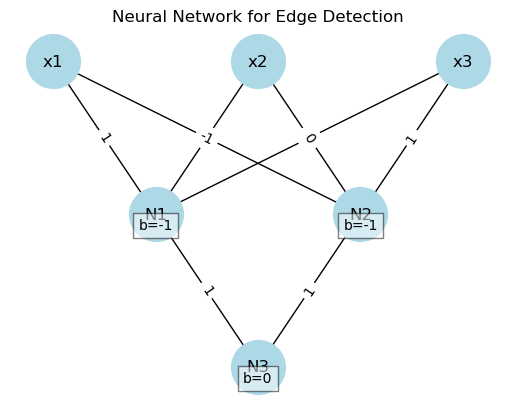

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node('x1', pos=(0, 2))
G.add_node('x2', pos=(1, 2))
G.add_node('x3', pos=(2, 2))
G.add_node('N1', pos=(0.5, 1))
G.add_node('N2', pos=(1.5, 1))
G.add_node('N3', pos=(1, 0))

# Add edges with weights and biases
G.add_edge('x1', 'N1', weight=1)
G.add_edge('x2', 'N1', weight=0)
G.add_edge('x3', 'N1', weight=-1)
G.add_edge('x1', 'N2', weight=-1)
G.add_edge('x2', 'N2', weight=0)
G.add_edge('x3', 'N2', weight=1)
G.add_edge('N1', 'N3', weight=1)
G.add_edge('N2', 'N3', weight=1)

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')

# Draw edges with labels
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Draw edge labels
edge_labels = {('x1', 'N1'): '1', ('x2', 'N1'): '0', ('x3', 'N1'): '-1',
               ('x1', 'N2'): '-1', ('x2', 'N2'): '0', ('x3', 'N2'): '1',
               ('N1', 'N3'): '1', ('N2', 'N3'): '1'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add bias labels to nodes
bias_labels = {'N1': '-1', 'N2': '-1', 'N3': '0'}
for node, bias in bias_labels.items():
    x, y = pos[node]
    plt.text(x, y-0.1, s=f'b={bias}', bbox=dict(facecolor='white', alpha=0.5), horizontalalignment='center')

plt.title('Neural Network for Edge Detection')
plt.axis('off')
plt.show()
